In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
# !pip install seaborn

In [2]:
filename = 'heart.csv'
df = pd.read_csv(filename)

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
# Dataset size
df.shape

(918, 12)

In [11]:
# Column names
list(df.columns)

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [6]:
## Missing values

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [24]:
# приведемо всі рядкові категоріальні змінні до чисельного виду
# для того щоб можна було включити їх в моделі класифікації
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])

In [25]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


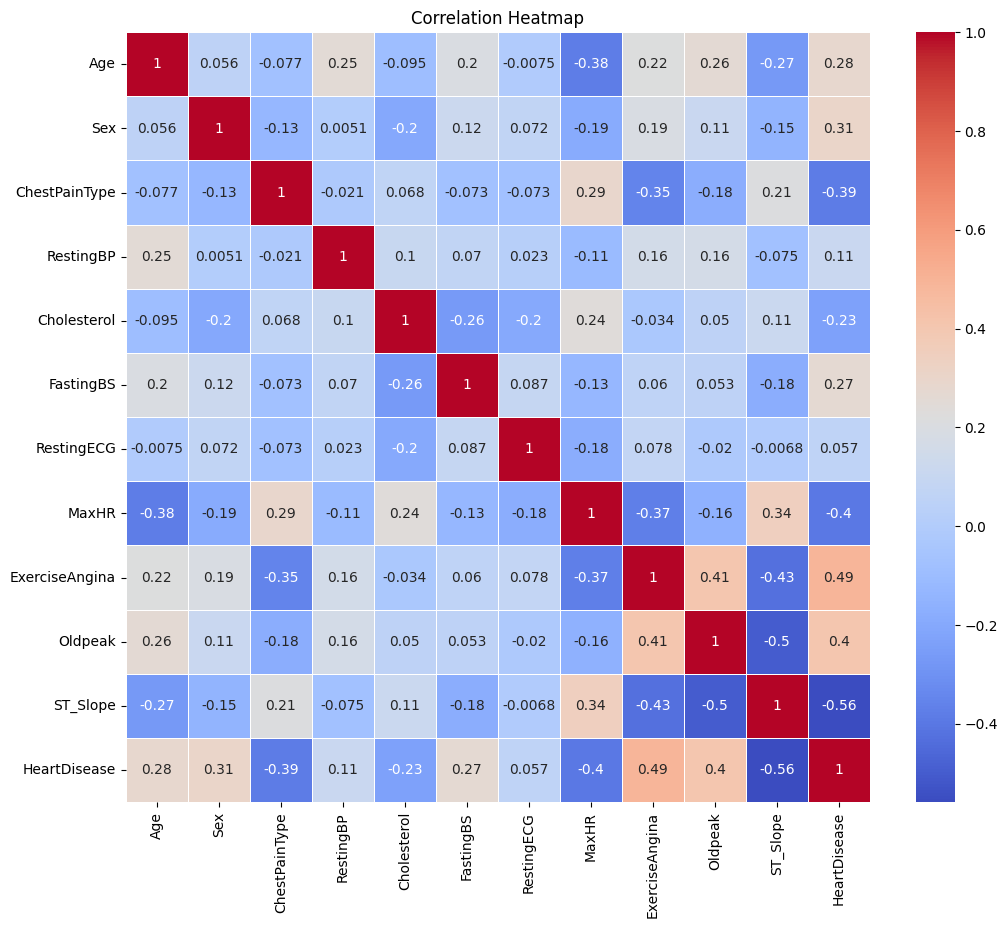

In [27]:
# побудова матриці кореляцій між змінними у вигляді "теплової мапи"
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

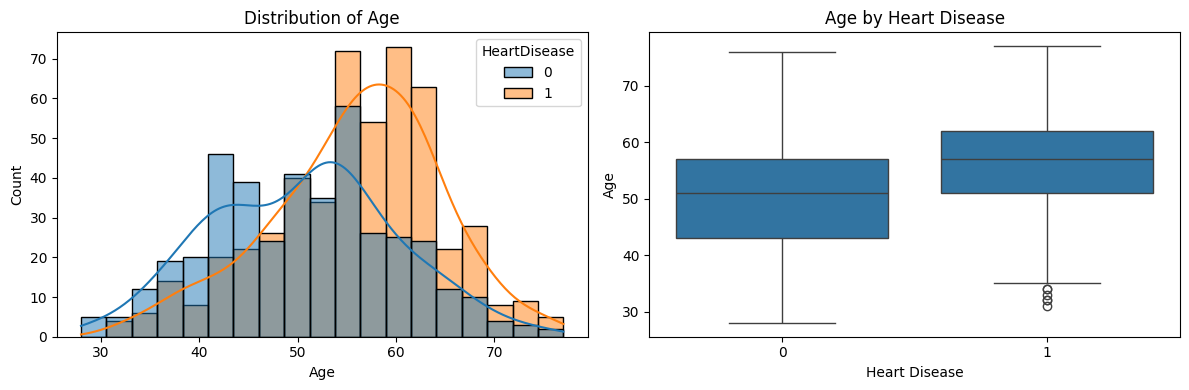

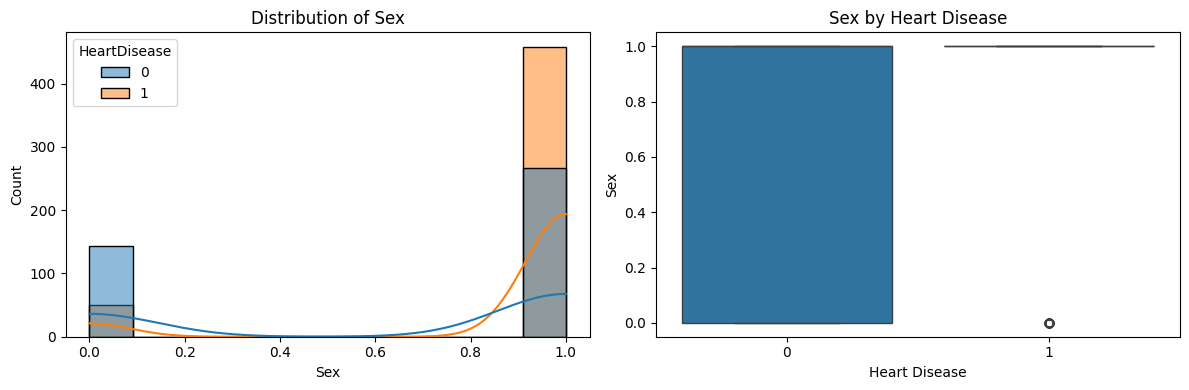

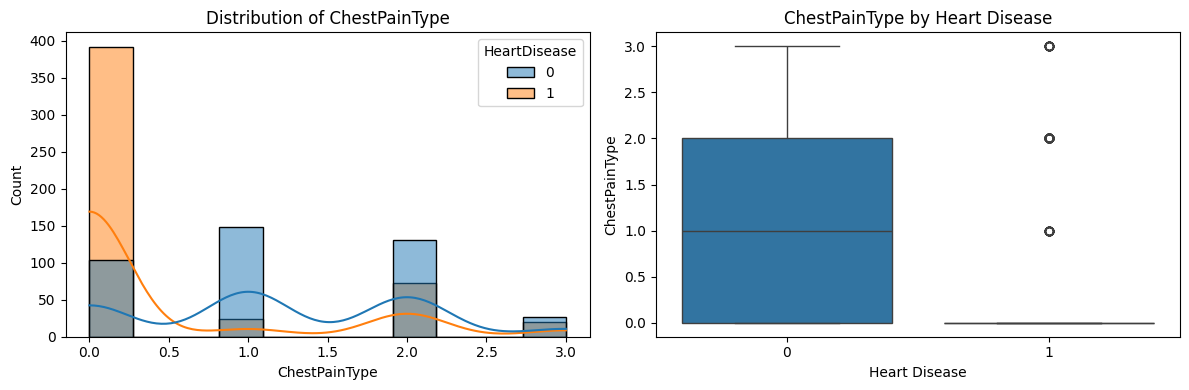

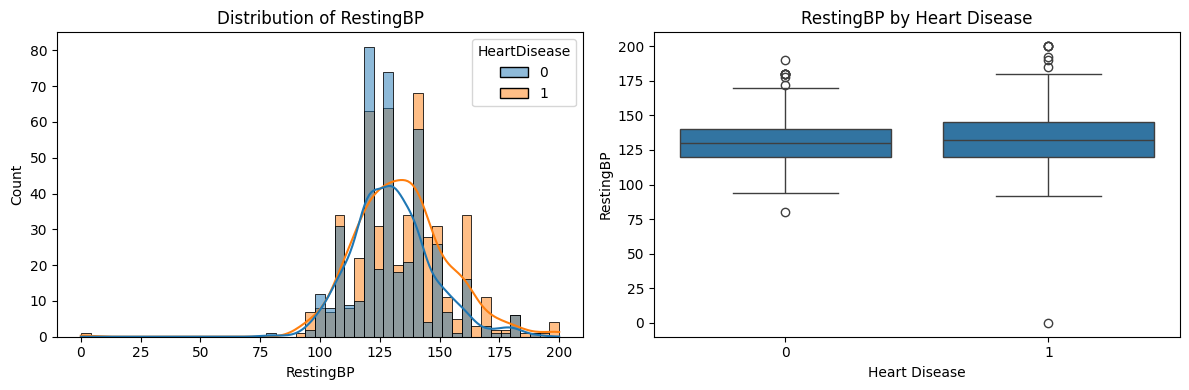

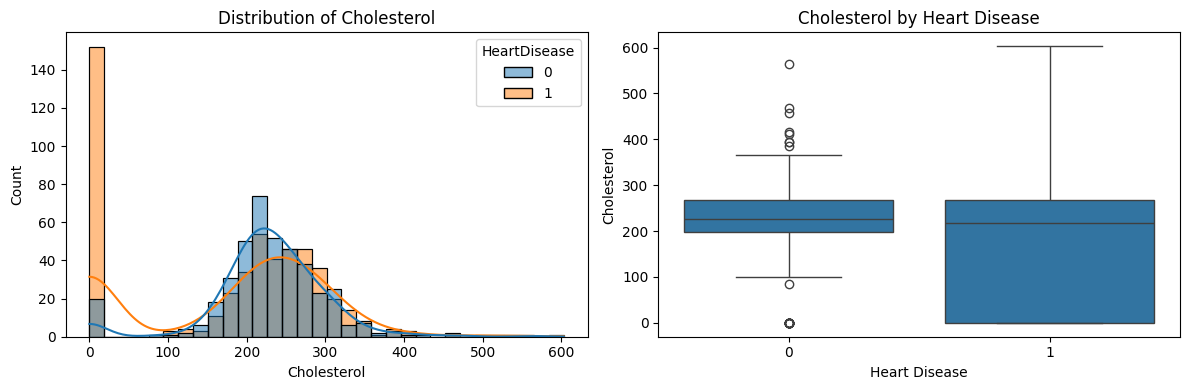

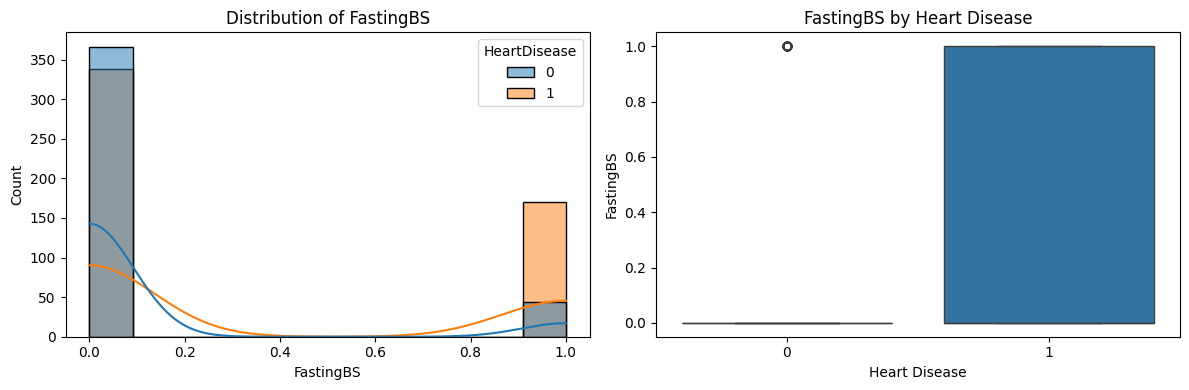

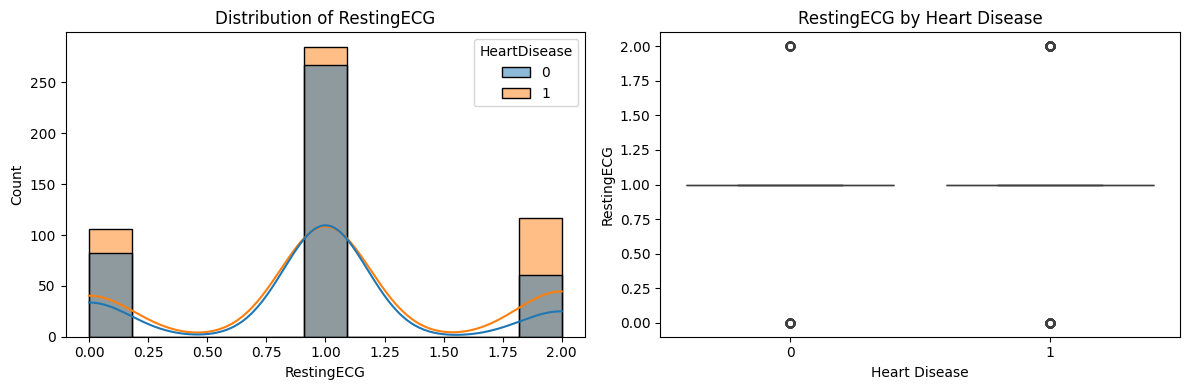

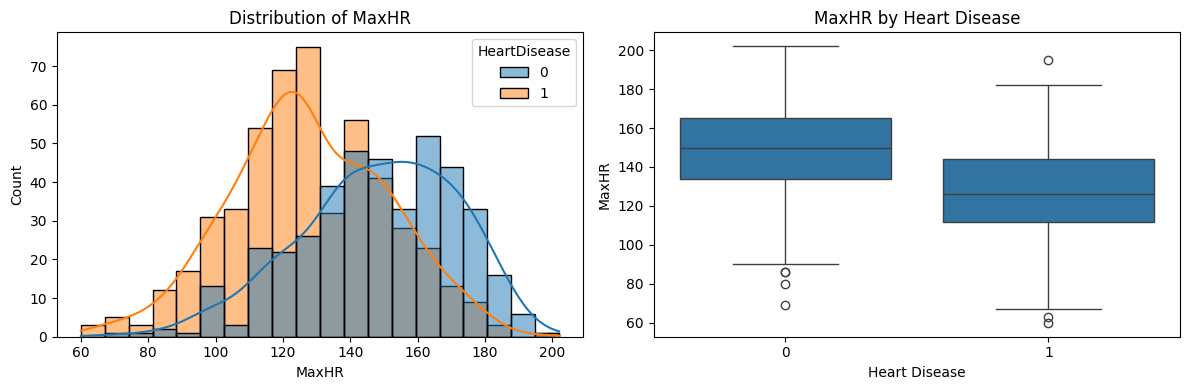

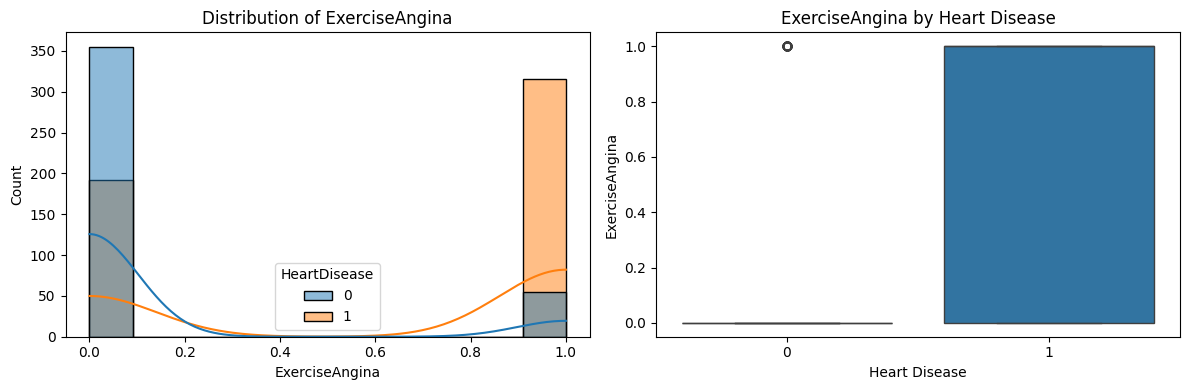

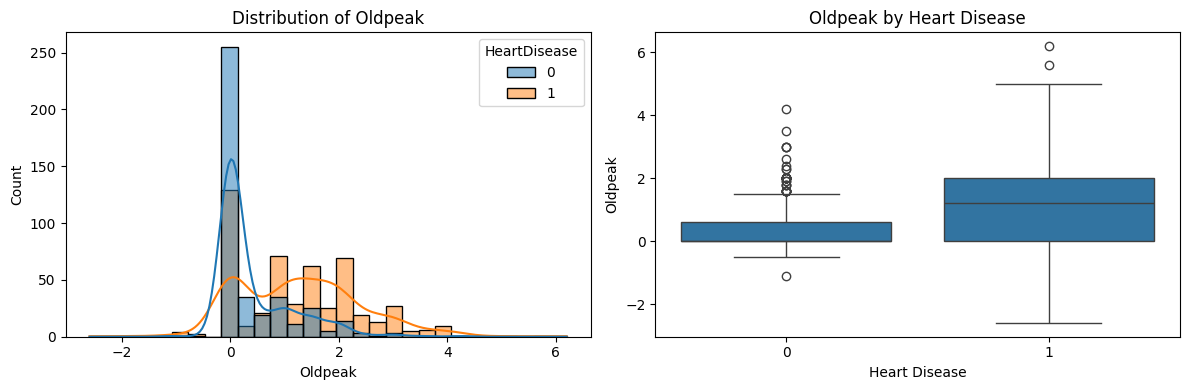

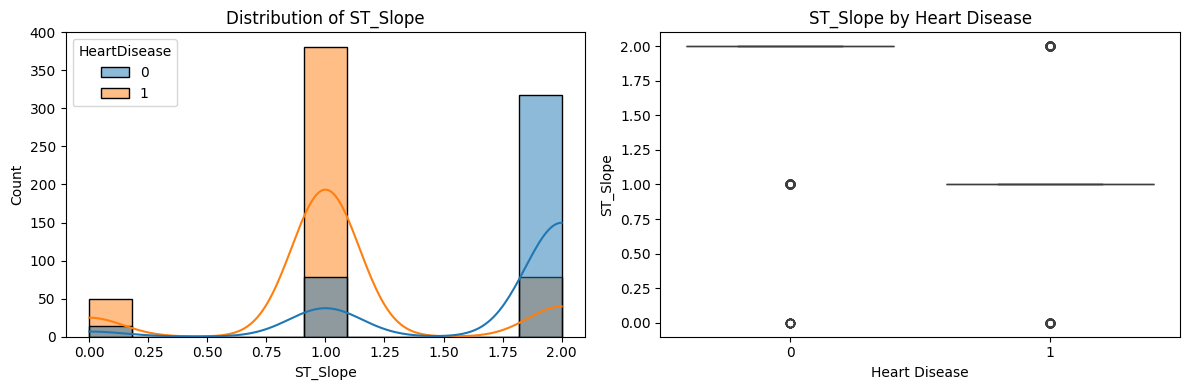

In [28]:
# Всі ознаки, окрім 'HeartDisease'
features = df.columns[df.columns != 'HeartDisease']

# Побудова гістограм та boxplot-ів для кожної ознаки
# Разом з Kernel density estimation (KDE)
for feature in features:
    plt.figure(figsize=(12, 4))
    
    # Гістограма для поточної ознаки
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=feature, hue='HeartDisease', kde=True)
    plt.xlabel(feature)
    plt.title(f'Distribution of {feature}')
    
    # Boxplot для поточної ознаки
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='HeartDisease', y=feature)
    plt.xlabel('Heart Disease')
    plt.ylabel(feature)
    plt.title(f'{feature} by Heart Disease')
    
    plt.tight_layout()
    plt.show()

In [33]:
### Нормалізація даних

ignore = ['HeartDisease', 'Sex', 'ExerciseAngina', 'RestingECG', 'ChestPainType', 'ST_Slope']

# Копіюємо вихідний датасет
normalized_df = df.copy()

# Вибираємо ознаки, які потрібно нормалізувати (усі, окрім ігнорованих ознак)
features_to_normalize = [col for col in normalized_df.columns if col not in ignore]

# Ініціалізуємо StandardScaler
scaler = StandardScaler()

# Нормалізуємо вибрані ознаки в окремому датасеті
normalized_df[features_to_normalize] = scaler.fit_transform(normalized_df[features_to_normalize])

# Виводимо нормалізований датасет
normalized_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,-0.551341,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,-0.551341,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,-0.551341,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,-0.551341,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,-0.551341,1,-0.581981,0,-0.832432,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,3,-1.210356,0.596393,-0.551341,1,-0.188999,0,0.293283,1,1
914,1.536902,1,0,0.627078,-0.053049,1.813758,1,0.164684,0,2.357094,1,1
915,0.370100,1,0,-0.129513,-0.620168,-0.551341,1,-0.857069,1,0.293283,1,1
916,0.370100,0,1,-0.129513,0.340275,-0.551341,0,1.461525,0,-0.832432,1,1


In [58]:
X_data = normalized_df.values[:, :-1].astype(np.float32)
y_data = normalized_df.values[:, -1].astype(int)
# normalized_df

In [59]:
# Розіб'ємо датасет на тренувальний і тестувальний(для перевірки якості моделей)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [63]:
X_train, y_train

(array([[-1.220994  ,  1.        ,  2.        , ...,  0.        ,
         -0.08195566,  0.        ],
        [-1.8574314 ,  1.        ,  2.        , ...,  0.        ,
         -0.8324324 ,  2.        ],
        [ 0.2640268 ,  1.        ,  0.        , ...,  1.        ,
          0.10566353,  1.        ],
        ...,
        [ 0.68831843,  1.        ,  0.        , ...,  1.        ,
          0.4809019 ,  2.        ],
        [ 0.68831843,  1.        ,  0.        , ...,  1.        ,
         -0.8324324 ,  2.        ],
        [-1.4331398 ,  0.        ,  0.        , ...,  0.        ,
          1.0437595 ,  1.        ]], dtype=float32),
 array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 

In [72]:
# Класифікація

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')

In [73]:
# Насправді дуже погана модель для багатовимірних даних оскільки при збільшенні простору 
# (наближенні до нескінченнсоті) відстань між точками стає більш однаковою (принаймні в Lp-просторі)
# тому знайти гіперплощину яка точно відділяє класи стає складніше
# 1. kNN 
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(knn, param_grid, cv=5)
grid_knn.fit(X_train, y_train)
knn_best = grid_knn.best_estimator_
knn_predictions = knn_best.predict(X_test)
print("kNN Classification Report:")
print(classification_report(y_test, knn_predictions))
print("kNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))

kNN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        77
           1       0.92      0.79      0.85       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.86      0.84      0.84       184

kNN Confusion Matrix:
[[70  7]
 [22 85]]


In [74]:
# 2. Decision Tree
decision_tree = DecisionTreeClassifier()
param_grid = {'max_depth': [3, 5, 7, 9]}
grid_tree = GridSearchCV(decision_tree, param_grid, cv=5)
grid_tree.fit(X_train, y_train)
tree_best = grid_tree.best_estimator_
tree_predictions = tree_best.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, tree_predictions))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, tree_predictions))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Decision Tree Confusion Matrix:
[[66 11]
 [17 90]]


In [79]:
# 3. SVM
svm = SVC()
# param_grid = {
#     'C': [0.1, 1, 10],
#     'gamma': [0.001, 0.01, 0.1, 1],
#     'degree': [2, 3],
#     'coef0': [0.0, 1.0],
#     'shrinking': [True, False],
#     'class_weight': [None, 'balanced'],
#     'decision_function_shape': ['ovr', 'ovo']
# }

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
}

grid_svm = GridSearchCV(svm, param_grid, cv=5)
grid_svm.fit(X_train, y_train)
svm_best = grid_svm.best_estimator_
svm_predictions = svm_best.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.91      0.86      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

SVM Confusion Matrix:
[[68  9]
 [15 92]]


In [76]:
# 4. Random Forest
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [100, 150, 200], 'max_depth': [3, 5, 7, 9]}
grid_rf = GridSearchCV(random_forest, param_grid, cv=5)
grid_rf.fit(X_train, y_train)
rf_best = grid_rf.best_estimator_
rf_predictions = rf_best.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

Random Forest Confusion Matrix:
[[68  9]
 [12 95]]


In [77]:
# 5. AdaBoost
adaboost = AdaBoostClassifier()
param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]}
grid_ab = GridSearchCV(adaboost, param_grid, cv=5)
grid_ab.fit(X_train, y_train)
ab_best = grid_ab.best_estimator_
ab_predictions = ab_best.predict(X_test)
print("AdaBoost Classification Report:")
print(classification_report(y_test, ab_predictions))
print("AdaBoost Confusion Matrix:")
print(confusion_matrix(y_test, ab_predictions))

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

AdaBoost Confusion Matrix:
[[68  9]
 [16 91]]
